<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-线性回归（Linear-Regression）" data-toc-modified-id="1.-线性回归（Linear-Regression）-1">1. 线性回归（Linear Regression）</a></span><ul class="toc-item"><li><span><a href="#1.1-标准方程（The-Normal-Equation）" data-toc-modified-id="1.1-标准方程（The-Normal-Equation）-1.1">1.1 标准方程（The Normal Equation）</a></span></li></ul></li></ul></div>

In [ ]:
# Common imports
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn


%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

np.random.seed(42)
# warnings.filterwarnings(action='ignore', message="^internal gelsd")

print('Version of Python:', sys.version)
print('Version of pandas:', pd.__version__)
print('Version of Scikit-Learn:', sklearn.__version__)

# 1. 线性回归（Linear Regression）

**<font color='blue'>线性模型</font>** 通过对输入特征加权求和（weighted sum），再加上一个称为偏置项（bias term）的常量（也称为截距项（intercept term）来做预测，公式如下：

$$\hat{y}=\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

其中，

- $\hat{y}$ 是预测值

- $n$ 是特征数量

- $x_i$ 是第 i 个特征值

- $\theta_i$ 是第 i (0, 1, 2, ..., n) 个模型参数

<br>

对应的**向量化公式（vectorized form）**如下：

$$\hat{y}=h_{\theta}(\pmb{x})=\pmb{\theta} \cdot \pmb{x}$$

其中，

- $\pmb{\theta}$ 是模型的参数向量（parameter vector），包含偏置项（$\theta_0$） 和特征项（$\theta_1$ 到 $\theta_n$）

- $\pmb{x}$ 是样本的特征向量（feature vector），包含 $x_0$ 到 $x_1$，其中 $x_0$ 始终等于 1

- $\pmb{\theta} \cdot \pmb{x}$ 是向量 $\pmb{\theta}$ 和向量 $\pmb{x}$ 的点积（product），其值等于 $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$

- $h_{\theta}(\pmb{x})$ 是假设函数（hypothesis function），使用的的是模型参数 $\pmb{\theta}$

<br>

**<font color='crimson'>在 ML 中，向量通常表示为列向量（column vectors）——是一个单列二维数组。</font>** 如果 $\pmb{\theta}$ 和 $\pmb{x}$ 是列向量，那么预测值为 $\hat{y}=\pmb{\theta}^T \pmb{x}$（$\pmb{\theta}$ 和 $\pmb{x}$ 的矩阵乘积）。

训练模型时就是设置参数直到模型最拟合训练数据。那么就需要知道如何度量模型在训练数据上的拟合程度（好还是坏）。

回归任务最常用的性能指标是 RMSE (Root Mean Square Error)，即在训练过程中需要找到使 RMSE 最小的参数 $\pmb{\theta}$。**<font color='crimson'>在实践中，最小化 MSE 比最小化 RMSE 简单，并且两者效果相同。</font>**

线性回归模型的损失函数（cost function）——MSE

$$MSE(\pmb{\theta})=MSE(\pmb{X}, h_{\pmb{\theta}})=\frac{1}{m}\sum^m_{i=1}{(\pmb{\theta}^T \pmb{x}^i - y^i)}^2$$

## 1.1 标准方程（The Normal Equation）

为了使损失函数 $MSE(\pmb{\theta})$ 最小，有一个闭式解（closed-form）方法——通过一个数学公式直接给出结果。

标准方程是

$$\hat{\pmb{\theta}}=({\pmb{X}}^T {\pmb{X}})^{-1} {\pmb{X}}^T \pmb{y}$$

其中，

- $\hat{\pmb{\theta}}$ 是使损失函数最小的 $\pmb{\theta}$ 值

- $\pmb{y}$ 是由 $y^1$ 到 $y^m$ 组成的向量

In [2]:
# 随机生成数据集
np.random.seed(42)

x = 2 * np.random.rand(100, 1)
# y = 4 + 3 * x + noise
y = 4 + 3 * x + np.random.randn(100, 1)

x.shape, y.shape

((100, 1), (100, 1))

In [3]:
x[:4]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697]])

In [4]:
y[:4]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199]])

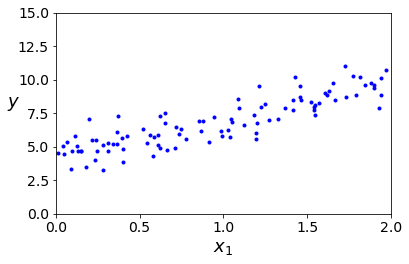

In [5]:
plt.figure(figsize=(6, 3.7))
plt.plot(x, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

使用标准方程来计算 $\hat{\pmb{\theta}}$：

- 用 `np.linalg` 中 `inv()` 函数对矩阵求逆

- 用 `dot()` 方法来计算矩阵乘积

In [7]:
# 增加常数项
x_b = np.c_[np.ones((100, 1)), x]

x_b.shape

(100, 2)

In [9]:
x_b[:4]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697]])

In [10]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

生成数据的函数是 $y=4 + 3x_1 + guassian\_noise$，根据公式计算出来的是 $y=4.215 + 2.770x$，这非常接近了，但是噪声似的不可能完全得到原始函数的参数。

In [11]:
x_c = np.c_[x, np.ones((100, 1))]
x_c[:4]

array([[0.74908024, 1.        ],
       [1.90142861, 1.        ],
       [1.46398788, 1.        ],
       [1.19731697, 1.        ]])

In [12]:
np.linalg.inv(x_c.T.dot(x_c)).dot(x_c.T).dot(y)

array([[2.77011339],
       [4.21509616]])

现在可以做预测了：

In [14]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
x_new_b

array([[1., 0.],
       [1., 2.]])

In [16]:
x_new_b.dot(theta_best)

array([[4.21509616],
       [9.75532293]])